In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import seaborn as sns

pd.options.display.max_rows = 999

In [3]:
batting_df = pd.read_csv('./Cricket.csv',encoding='ISO-8859-1')
batting_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
factors_df = batting_df[['Ave','SR']]

In [5]:
factors_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [9]:
scaler = StandardScaler()
factors_df[factors_df.columns] = scaler.fit_transform(factors_df)

In [10]:
factors_df.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


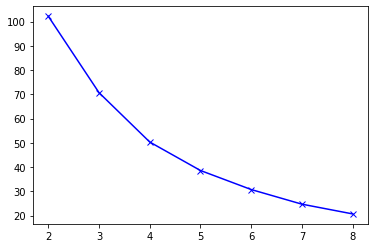

In [18]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(factors_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

plt.plot(range_n_clusters,ssd, 'bx-') 
plt.show()


In [20]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(factors_df)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [21]:
batting_df['clusters'] = kmeans.labels_

In [22]:
batting_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,clusters
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3


In [33]:
batting_df[batting_df.Player.str.contains('v Kohli',case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,clusters
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,2


In [35]:
batting_df[batting_df.clusters == 2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,clusters
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,2
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,2
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,2
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,2
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,2
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,2
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,2
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,2
